# Problemas 

## 1. Area

Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2\*np.pi, 2\*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)


In [1]:
#librerias
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import optimize

##### a) Encontrar la ecuacion trascendental.

Primero planteamos las ecuaciones que describen el área de una circulo y segmento circular.

\begin{equation}
Ac: Área del circulo 
As: Área de un segmento circular 
Ac = 2{\pi}r^2 
As = \frac{1}{2}(\theta - \sin\theta)r^2
\end{equation} 

Por otro lado se nos pide que el area del segmento circular sea igual a una cuarta parte del área del circulo, es decir:

\begin{equation}
\frac{1}{4}Ac = As 
\frac{1}{4}{\pi}r^2 = \frac{1}{2}(\theta - \sin\theta)r^2 
\frac{\pi}{2} = \theta - \sin\theta 
f(\theta)= \theta - \sin\theta - \frac{\pi}{2}=0
\end{equation}

##### b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

In [2]:
f = lambda theta: theta - np.sin(theta) - np.pi/2 #Función labmda del problema

##### c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre  [−2𝜋,2𝜋] . Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2*np.pi, 2*np.pi, 1000 )

In [3]:
theta = np.linspace(-2 * np.pi, 2 * np.pi, 1000) #Divide el intervalo en 1000

df = pd.DataFrame() #Crea el dataFrame.
df["theta"] = theta #Agrega una columna theta y los valores.

##### d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

In [4]:
df["F_theta"] = f(theta) #Agrega una columna F_theta con la evalución de los valores theta.

##### f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.


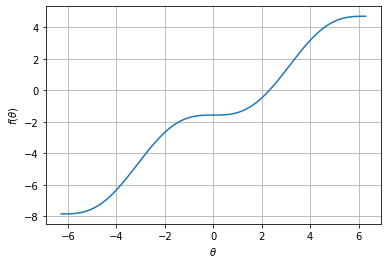

In [5]:
#Crear grafica.
plt.figure()
plt.plot(df["theta"], df["F_theta"])
plt.xlabel("$\\theta$")
plt.ylabel("$f(\\theta)$")
plt.grid()
plt.show()

##### Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

##### g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

##### h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

##### i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

##### j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)

In [6]:
#Metodo de bisección
root_biseccion = optimize.bisect(f, 0, 4)
print(f"El ángulo encontrado por el metodo de bisección es: {root_biseccion:.3} radianes.\n")

El ángulo encontrado por el metodo de bisección es: 2.31 radianes.



In [7]:
#Metodo de Newton-Rapshon
root_newton_rapshon = optimize.newton(f, 2)
print(f"El ángulo encontrado por el metodo de Newton-Rapshon es: {root_newton_rapshon:.3} radianes.\n")

El ángulo encontrado por el metodo de Newton-Rapshon es: 2.31 radianes.



In [8]:
#Metodo de punto fijo
root_punto_fijo = optimize.fixed_point(lambda x: x-f(x),2)
print(f"El ángulo encontrado por el metodo de punto dijo es: {root_punto_fijo:.3} radianes.\n")

El ángulo encontrado por el metodo de punto dijo es: 2.31 radianes.



# 2. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html

0. Establezca las siguietnes condiciones inciales.

    v0 = 60 #Velocidad en m/s

    alpha = np.pi #Angulo del viento

    theta = np.deg2rad(45) #Angulo de lanzamiento

    u = v0/2             #rapidez del viento

    b = 0.05             #Parametro de friccion 

    g = 9.8                #Aceleracion de la gravedad m/s2

    Params = (alpha, v0, b, u,g)  #Parametros en tupla.

1. Defina dos funciones, una para x y otra para y. 
2. Construya un diccionario con las claves "X", "Y", "Tiempo".
3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.
4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).
5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  
6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.
7. Realice una interpolacion de R como función de theta.

#####  0. Establezca las siguietnes condiciones inciales.

In [9]:
# Condiciones iniciales 
v0 = 60 # Velocidad en m/s.
alpha = np.pi # Angulo de viento.
theta = np.deg2rad(45) # Angulo de lanzamiento.
u = v0/2 # Rapidez del viento.
b = 0.05 # Parametro de fricción.
g = 9.8 # Acelaración de la gravedad m/s^2.

###### 1. Defina dos funciones, una para x y otra para y. 

In [10]:
def postion_x (t): # Función de posición en el eje x.
    # Ti: termino i.
    T1 = u*np.cos(alpha)*t                        
    T2 = (1./b)*(v0*np.cos(theta) - u*np.cos(alpha))   
    T3 = 1 - np.e**(-b*t)
    return T1 + T2*T3

    
def postion_y (t): # Función de posición en el eje y.
    # Ti: termino i.
    T1 = (1./b)*(g/b + v0*np.sin(theta) - u*np.sin(alpha)) 
    T2 = (1 - np.e**(- b * t)) 
    T3 = (g / b - u *  np.sin(alpha))*t
    return T1* T2 - T3


##### 2. Construya un diccionario con las claves "X", "Y", "Tiempo".

In [11]:
t = np.linspace(0, 10, 1000) # Tiempo
x = postion_x(t) # Evaluar posición en x.
y = postion_y(t) # Evaluar posición en y.
positions_tiempo = {"X":x, "Y":y, "Tiempo":t} # Diccionario con las claves "X", "Y", "Tiempo"

##### 3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"

In [12]:
df = pd.DataFrame.from_dict(positions_tiempo) # Dataframe del diccionario "positions_tiempo"

##### 4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).

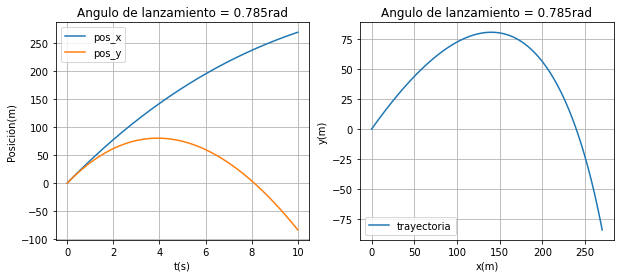

In [13]:
# Crear gráfica de x, y como funciones de tiempo.
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(df["Tiempo"], df["X"], label = "pos_x")
plt.plot(df["Tiempo"], df["Y"], label = "pos_y")
plt.xlabel("t(s)")
plt.ylabel("Posición(m)")
plt.title("Angulo de lanzamiento = " + str("%.3lf"%theta) + "rad")
plt.grid()
plt.legend()
plt.subplot(122)
plt.plot(df["X"], df["Y"], label="trayectoria") 
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.title("Angulo de lanzamiento = " + str("%.3lf"%theta) + "rad")
plt.grid()
plt.legend()
plt.show()

##### 5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

Para determinar el alcance máximo se debe hallar el instante de tiempo donde y = 0, para esto es necesario encontrar las raíces de la función position_y y posteriormente evaluar estas en la función position_x.

In [14]:
root_position_y = optimize.newton(postion_y, 7) # Determinar las raices de position_y
R = postion_x(root_position_y) # Alcance maximo R
print(f"El alcance máximo con solución teórica y = 0 y ángulo de lanzamiento de 45 grados es: {R:.5} m")

El alcance máximo con solución teórica y = 0 y ángulo de lanzamiento de 45 grados es: 239.61 m


##### 6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

    Angle  Root Position y       Scope
0    10.0         2.089913  114.092050
1    15.0         3.089693  159.114248
2    20.0         4.051319  195.251607
3    25.0         4.969343  222.192572
4    30.0         5.838759  239.866010
5    35.0         6.654990  248.413854
6    40.0         7.413869  248.164280
7    45.0         8.111627  239.606149
8    50.0         8.744883  223.365113
9    55.0         9.310630  200.181558
10   60.0         9.806233  170.890414
11   65.0        10.229417  136.402731
12   70.0        10.578262   97.688848
13   75.0        10.851205   55.762972
14   80.0        11.047030   11.668920
15   85.0        11.164872  -33.533198
16   90.0        11.204210  -78.779601


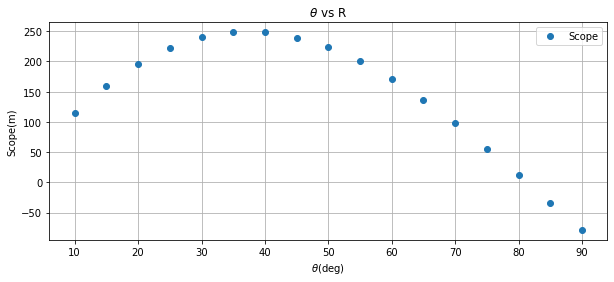

In [15]:

def angle_roots_scope(): # Metodo para obtener un df con las raices con los angulos variando entre 10 y 90 grados cada 5 grados.
    theta_variable = np.linspace(10,90,17) #Crea un ndarray de 10 a 90 espaciado de a 5.
    roots_angle_variable = [] # Array donde se guardaran las raices mediante se varia el angulo theta.
    
    y = lambda t: ((1./b)*(g/b + v0*np.sin(theta) - u*np.sin(alpha)))*(  # Función lambda posición y.
        (1 - np.e**(- b * t))) - (g / b - u * np.sin(alpha))*t 
    
    x = lambda t,theta: u*np.cos(alpha)*t  + (1./b)*((v0*np.cos(np.deg2rad( # Función lambda posición x.
        theta))) - (u*np.cos(alpha))) * (1 - np.e**(-b*t))
    
    for i in theta_variable: # Ciclo para hallar las raíces variando el Angulo de lanzamiento theta.
        theta = np.deg2rad(i)
        roots_angle_variable.append(optimize.newton(y, 7, maxiter=1000))
    
    angle_root_ditinari = {"Angle": theta_variable, "Root Position y": roots_angle_variable} # Crar diccionario.
    angle_root_df = pd.DataFrame.from_dict(angle_root_ditinari) # Crear Dataframe.
    angle_root_df["Scope"] = x(np.array(roots_angle_variable),theta_variable) # Agrega el Scope al dataframe.
    return angle_root_df


angle_roots_scope_df = angle_roots_scope() # Crear el df.
print(angle_roots_scope_df)

# Crear gráfica de alcance máximo R como función de 𝜃. 
plt.figure(figsize=(10, 4))
plt.plot(angle_roots_scope_df["Angle"], angle_roots_scope_df["Scope"],"o",label = "Scope")
plt.xlabel("$θ$(deg)")
plt.ylabel("Scope(m)")
plt.title("$θ$ vs R")
plt.grid()
plt.legend()
plt.show()


##### 7. Realice una interpolacion de R como función de theta.

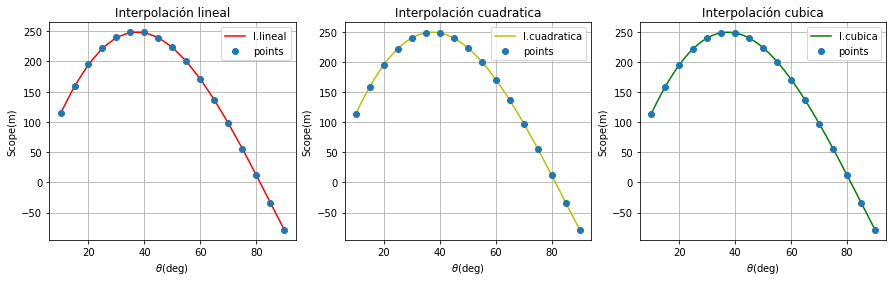

In [16]:
# Importar el metodo para interpolar 
from scipy.interpolate import interp1d

angles = np.array(angle_roots_scope_df["Angle"]) # Ángulos de lanzamiento.
r_scope = np.array(angle_roots_scope_df["Scope"]) # Alcances máximos(Scope).

# Interpolaciones.
f_interp_linear = interp1d(angles, r_scope, kind = 'linear') # Interpolación lineal.
f_interp_quadratic = interp1d(angles, r_scope, kind = 'quadratic') # Interpolación cuadratica.
f_interp_cubic = interp1d(angles, r_scope, kind = 'cubic') # Interpolación cubica.

X = np.linspace(10, 90, 100)
Y_linear = f_interp_linear(X)
Y_quadratic = f_interp_quadratic(X)
Y_cubic = f_interp_cubic(X)


# Construir la graficas.
plt.figure(figsize=(15, 4))
# Grafica interpolación lineal.
plt.subplot(131)
plt.plot(X, Y_linear, 'r', label = 'I.lineal')
plt.plot(angle_roots_scope_df["Angle"], angle_roots_scope_df["Scope"],"o",label = "points")
plt.xlabel("$θ$(deg)")
plt.ylabel("Scope(m)")
plt.title("Interpolación lineal")
plt.legend()
plt.grid()
# Grafica interpolación cuadratica.
plt.subplot(132)
plt.plot(X, Y_quadratic, 'y', label = 'I.cuadratica')
plt.plot(angle_roots_scope_df["Angle"], angle_roots_scope_df["Scope"],"o",label = "points")
plt.xlabel("$θ$(deg)")
plt.ylabel("Scope(m)")
plt.title("Interpolación cuadratica")
plt.legend()
plt.grid()
# Grafica interpolación cubica.
plt.subplot(133)
plt.plot(X, Y_cubic, 'g',label = 'I.cubica')
plt.plot(angle_roots_scope_df["Angle"], angle_roots_scope_df["Scope"],"o",label = "points")
plt.xlabel("$θ$(deg)")
plt.ylabel("Scope(m)")
plt.title("Interpolación cubica")
plt.legend()
plt.grid()
plt.show()